In [1122]:
#We're in EXERCISE 3

In [1123]:
'''pip install pandas
pip install matplotlib
pip install numpy'''

'pip install pandas\npip install matplotlib\npip install numpy'

In [1124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as sco

# Import datatsets

In [1125]:
#Monthly RI and capitalization of EUR firms
df_EUR_M_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/ex_2/df_EUR_monthly_capitalization.csv')
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/ex_2/df_EUR_monthly_RI.csv')
#Yearly RI and capitalization of EUR firms
df_EUR_Y_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/df_EUR_yearly_capitalization.csv')
df_EUR_Y_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/df_EUR_yearly_return.csv')
#Yearly E score 
df_E_score=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/DS_EScore_Y.csv')

# Question 3

### Create the dataset 

In [1126]:
#Create a new column with only the 2 first caracters of the column ISIN

df_E_score['ISIN_First2'] = df_E_score['ISIN'].str[:2]

In [1127]:
df_E_score

,ISIN,NAME,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,...,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022,ISIN_First2
0,AN8068571086,SCHLUMBERGER,NaN,NaN,NaN,53.65,23.33,0.00,0.00,40.70,...,75.71,71.54,73.65,85.87,81.71,80.89,78.25,87.80,86.10,AN
1,AT000000STR1,STRABAG SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.69,55.55,56.98,58.49,64.61,62.49,60.42,58.09,56.89,AT
2,AT00000VIE62,FLUGHAFEN WIEN,NaN,NaN,NaN,NaN,18.31,27.55,10.48,4.84,...,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN,AT
3,AT0000606306,RAIFFEISEN BANK INTL.,NaN,NaN,NaN,NaN,NaN,NaN,25.56,23.63,...,73.75,75.14,82.52,82.94,61.29,63.22,61.36,62.62,61.64,AT
4,AT0000652011,ERSTE GROUP BANK,NaN,NaN,NaN,27.08,24.60,25.81,25.56,30.64,...,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,US9839191015,XILINX DEAD - DELIST.15/02/22,NaN,NaN,NaN,0.00,0.00,8.15,0.00,43.23,...,25.88,27.68,38.31,41.42,NaN,56.70,57.38,NaN,NaN,US
1527,US98421M1062,XEROX HOLDINGS,NaN,NaN,NaN,NaN,NaN,NaN,74.94,76.45,...,79.67,85.00,92.80,77.37,74.08,76.22,73.46,77.11,74.54,US
1528,US9884981013,YUM! BRANDS,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,...,66.98,76.89,80.63,80.92,82.19,84.67,88.84,87.72,NaN,US
1529,US98956P1021,ZIMMER BIOMET HDG.,NaN,NaN,NaN,0.00,18.18,24.11,21.85,28.25,...,51.30,54.55,9.37,8.92,13.41,23.33,38.82,38.19,35.17,US


In [1128]:
#Compute the monthly returns of EUR firms
df_EUR_M_RI.set_index('NAME', inplace = True)

df_EUR_M_RI.drop(df_EUR_M_RI.columns[:4], axis=1, inplace=True)

df_EUR_M_RI.columns = pd.to_datetime(df_EUR_M_RI.columns)

df_EUR_M_RI_08 = df_EUR_M_RI.loc[:, (df_EUR_M_RI.columns >= pd.to_datetime("2007-01-01"))]

df_EUR_M_RI_T = df_EUR_M_RI_08.T

df_M_returns = df_EUR_M_RI_T.pct_change()

#df_M_returns

In [1129]:
#Extract the list of firms that have an Environmental score
firms_list = df_E_score['NAME'].tolist()
firms_list

['SCHLUMBERGER',
 'STRABAG SE',
 'FLUGHAFEN WIEN',
 'RAIFFEISEN BANK INTL.',
 'ERSTE GROUP BANK',
 'TELEKOM AUSTRIA',
 'ANDRITZ',
 'OMV',
 'VERBUND',
 'WIENERBERGER',
 'VIENNA INSURANCE GROUP A',
 'VOESTALPINE',
 'MAYR-MELNHOF KARTON',
 'IMMOFINANZ',
 'ARISTOCRAT LEISURE',
 'AMP',
 'ANSELL',
 'ANZ GROUP HOLDINGS',
 'ASX',
 'BENDIGO & ADELAIDE BANK',
 'BHP GROUP',
 'BORAL',
 'BLUESCOPE STEEL',
 'COMMONWEALTH BK.OF AUS.',
 'CHALLENGER',
 'CIMIC GROUP DEAD - DELIST.11/05/22',
 'COCHLEAR',
 'COMPUTERSHARE',
 'CSL',
 'CSR',
 'DOWNER EDI',
 'DEXUS STAPLED UNITS',
 'ELDERS',
 'GOODMAN GROUP',
 'GPT GROUP STAPLED UNITS',
 'HARVEY NORMAN HOLDINGS',
 'INSURANCE AUS.GROUP',
 'ILUKA RESOURCES',
 'INCITEC PIVOT',
 'JAMES HARDIE INDUSTRIES CDI',
 'LENDLEASE GROUP STAPLED UNITS',
 'MIRVAC GROUP STAPLED UNITS',
 'MACQUARIE GROUP',
 'METCASH',
 'NATIONAL AUS.BANK',
 'NEWCREST MINING DEAD - DELIST.08/11/23',
 'ORIGIN ENERGY (EX BORAL)',
 'ORICA',
 'PERPETUAL',
 'QANTAS AIRWAYS',
 'QBE INSURANCE GROUP',


In [1130]:
#Get monthly returns of EUR firms with an Environmental score
df_M_returns_E = df_M_returns[df_M_returns.columns.intersection(firms_list)]
df_M_returns_E


NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,HOLMEN B,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,-0.068733,-0.043525,0.044308,-0.128370,0.000236,-0.045084,0.071533,0.004315,0.002618,-0.064098,...,-0.061145,-0.001679,-0.011071,-0.054552,-0.023143,-0.071658,0.185578,-0.078060,-0.124549,-0.090237
2007-03-31,0.054181,0.046109,0.126189,0.087085,0.013138,0.016336,0.169212,0.148572,0.052460,0.078100,...,0.047134,0.060810,0.111434,0.051096,0.031038,0.067845,0.127457,0.052216,0.054330,0.040650
2007-04-30,0.117565,0.037929,0.017653,0.158154,0.164524,0.064849,-0.060644,0.058167,0.021837,0.038186,...,0.094971,0.072692,0.036187,0.145635,0.065194,0.132583,0.062757,0.185050,0.009974,0.151563
2007-05-31,-0.080157,-0.026086,0.061920,0.040032,0.066878,-0.003339,0.069365,-0.003570,-0.010755,0.015520,...,-0.019841,-0.034906,-0.015122,-0.034976,-0.002258,0.250901,-0.040551,0.027658,0.053345,-0.086839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.010844,-0.102476,-0.040985,-0.125302,0.025707,0.041194,-0.093996,-0.056886,-0.023731,-0.069899,...,0.057246,-0.127134,-0.196640,-0.180800,-0.033070,-0.117770,-0.111130,-0.116587,-0.143647,-0.022490
2022-09-30,-0.021276,-0.018766,-0.096105,-0.106440,-0.140093,-0.139022,-0.152104,-0.136879,-0.178549,-0.037799,...,-0.113088,-0.220618,-0.072336,-0.075520,-0.015891,-0.083422,-0.143574,-0.076555,-0.243420,-0.033389
2022-10-31,0.007311,0.112197,0.259085,-0.085763,0.133224,0.093316,0.266377,0.100553,-0.034777,0.155775,...,-0.052283,0.060867,-0.071262,0.099971,0.037126,0.047419,0.177424,0.140971,0.123786,-0.068215
2022-11-30,0.041827,0.235500,0.120451,0.131216,0.133667,0.025726,0.230472,0.172049,0.071587,0.071967,...,0.112048,0.124684,0.209717,0.108593,0.057508,0.121188,0.129491,0.133878,0.028034,0.249844


In [1131]:
#Drop the row 2007-01-31 because it has only NaN values
df_M_returns_E = df_M_returns_E.drop('2007-01-31')
df_M_returns_E

NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,HOLMEN B,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
2007-02-28,-0.068733,-0.043525,0.044308,-0.128370,0.000236,-0.045084,0.071533,0.004315,0.002618,-0.064098,...,-0.061145,-0.001679,-0.011071,-0.054552,-0.023143,-0.071658,0.185578,-0.078060,-0.124549,-0.090237
2007-03-31,0.054181,0.046109,0.126189,0.087085,0.013138,0.016336,0.169212,0.148572,0.052460,0.078100,...,0.047134,0.060810,0.111434,0.051096,0.031038,0.067845,0.127457,0.052216,0.054330,0.040650
2007-04-30,0.117565,0.037929,0.017653,0.158154,0.164524,0.064849,-0.060644,0.058167,0.021837,0.038186,...,0.094971,0.072692,0.036187,0.145635,0.065194,0.132583,0.062757,0.185050,0.009974,0.151563
2007-05-31,-0.080157,-0.026086,0.061920,0.040032,0.066878,-0.003339,0.069365,-0.003570,-0.010755,0.015520,...,-0.019841,-0.034906,-0.015122,-0.034976,-0.002258,0.250901,-0.040551,0.027658,0.053345,-0.086839
2007-06-30,0.012280,0.005986,0.006952,-0.049264,-0.021353,-0.035212,0.162549,-0.014881,-0.095842,-0.011786,...,-0.036711,-0.149623,0.017547,-0.006174,0.043493,0.027450,-0.055661,-0.002777,0.064430,0.002972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.010844,-0.102476,-0.040985,-0.125302,0.025707,0.041194,-0.093996,-0.056886,-0.023731,-0.069899,...,0.057246,-0.127134,-0.196640,-0.180800,-0.033070,-0.117770,-0.111130,-0.116587,-0.143647,-0.022490
2022-09-30,-0.021276,-0.018766,-0.096105,-0.106440,-0.140093,-0.139022,-0.152104,-0.136879,-0.178549,-0.037799,...,-0.113088,-0.220618,-0.072336,-0.075520,-0.015891,-0.083422,-0.143574,-0.076555,-0.243420,-0.033389
2022-10-31,0.007311,0.112197,0.259085,-0.085763,0.133224,0.093316,0.266377,0.100553,-0.034777,0.155775,...,-0.052283,0.060867,-0.071262,0.099971,0.037126,0.047419,0.177424,0.140971,0.123786,-0.068215
2022-11-30,0.041827,0.235500,0.120451,0.131216,0.133667,0.025726,0.230472,0.172049,0.071587,0.071967,...,0.112048,0.124684,0.209717,0.108593,0.057508,0.121188,0.129491,0.133878,0.028034,0.249844


### Average/expected return

In [1132]:
#Compute the average (or expected) returns
avrg_returns = df_M_returns_E.mean()
avrg_returns

NAME
FLUGHAFEN WIEN              0.008193
ERSTE GROUP BANK            0.006853
OMV                         0.008647
VERBUND                     0.009810
WIENERBERGER                0.004763
                              ...   
HEXAGON B                   0.017364
ELECTROLUX B                0.007825
ATLAS COPCO A               0.014199
MODERN TIMES GROUP MTG B    0.007082
BOLIDEN ORD SHS             0.014991
Length: 423, dtype: float64

In [1133]:
#The company PROFASE probably dropped out of the market; the change in returns would be infinite, we set it to 0
avrg_returns[avrg_returns == np.inf] = 0 

### Covariance matrix

In [1134]:
#Compute the covariance matrix
cov_matrix = df_M_returns_E.cov()
cov_matrix

NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,HOLMEN B,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.008233,0.006911,0.004828,0.004463,0.005255,0.005089,0.004973,0.003225,0.006474,0.004084,...,0.002471,0.003494,0.003921,0.003087,0.001792,0.004061,0.003736,0.003189,0.005146,0.004223
ERSTE GROUP BANK,0.006911,0.018300,0.008634,0.007031,0.010185,0.008884,0.008513,0.004911,0.010671,0.008591,...,0.004669,0.006474,0.007221,0.006497,0.003389,0.008265,0.007160,0.006456,0.008522,0.010676
OMV,0.004828,0.008634,0.011251,0.005032,0.005696,0.005407,0.006945,0.003857,0.008372,0.006188,...,0.002901,0.004541,0.005143,0.003698,0.002618,0.005005,0.004700,0.004188,0.005593,0.007209
VERBUND,0.004463,0.007031,0.005032,0.009692,0.004968,0.004720,0.005558,0.002996,0.006564,0.004235,...,0.003249,0.004477,0.004805,0.003754,0.002040,0.004958,0.003251,0.003513,0.004625,0.005248
WIENERBERGER,0.005255,0.010185,0.005696,0.004968,0.015092,0.006931,0.008984,0.004094,0.009766,0.007343,...,0.005968,0.007172,0.007655,0.005913,0.002137,0.007920,0.007492,0.006792,0.008673,0.007419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,0.004061,0.008265,0.005005,0.004958,0.007920,0.005693,0.008504,0.003565,0.008759,0.006077,...,0.004860,0.006886,0.007387,0.005992,0.002922,0.013174,0.007711,0.007615,0.008246,0.009985
ELECTROLUX B,0.003736,0.007160,0.004700,0.003251,0.007492,0.005026,0.007049,0.002957,0.007012,0.005394,...,0.004141,0.005522,0.005540,0.005071,0.002424,0.007711,0.010817,0.006092,0.006186,0.008028
ATLAS COPCO A,0.003189,0.006456,0.004188,0.003513,0.006792,0.004772,0.007125,0.002925,0.007006,0.005225,...,0.004173,0.005904,0.005749,0.005204,0.002064,0.007615,0.006092,0.007914,0.006828,0.007905


### Minimum variance portfolio (MVP)

In [1135]:
#Taking the number of assets
numAssets = len(avrg_returns)

#Function to compute the variance
def min_var(weights):
    weights = np.array(weights)
    var = np.dot(weights.T, np.dot(cov_matrix * 12, weights))
    return var

#Initial conditions: initial weights -> EW and each weight >= 0
initialWeights = np.ones(numAssets)/numAssets
positivity_bounds = tuple((0, 1) for x in range(numAssets))

#Constraint: sum of weights = 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Optimize minimum variance portfolio
result_long_only_gmv_portfolio = sco.minimize(min_var, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
result_long_only_gmv_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.012363192649813896
       x: [ 5.780e-19  0.000e+00 ...  1.106e-18  1.847e-17]
     nit: 17
     jac: [ 3.782e-02  6.115e-02 ...  5.231e-02  4.770e-02]
    nfev: 7208
    njev: 17

In [1136]:
#Compute the minimum variance portfolio
avrg_returns_MVP = np.dot(result_long_only_gmv_portfolio['x'], avrg_returns)
avrg_returns_MVP

0.00730692100855625

In [1137]:
#Compute the annualized MVP
avrg_returns_MVP_ann = avrg_returns_MVP * 12
avrg_returns_MVP_ann

0.087683052102675

### Maximum return portfolio

In [1138]:
#Function to compute the returns
def max_return(weights):
    weighted_returns = -np.dot(weights, avrg_returns * 12)
    return weighted_returns

#Constraints (same as for the MVP portfolio)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}, {'type': 'ineq', 'fun': lambda x: x})
positivity_bounds = tuple((0, 1) for x in range(numAssets))
initialWeights = np.ones(numAssets)/numAssets

#Optimize maximum return portfolio
result_max_return_portfolio = sco.minimize(max_return, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
result_max_return_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.29486630468944314
       x: [ 6.565e-16  1.066e-15 ...  4.184e-17  0.000e+00]
     nit: 9
     jac: [-9.831e-02 -8.223e-02 ... -8.499e-02 -1.799e-01]
    nfev: 3816
    njev: 9

In [1139]:
#Check the weights of the maximum return portfolio
#result_max_return_portfolio['x']

In [1140]:
#Compute the maximum return portfolio
avrg_returns_MaxRP = np.dot(result_max_return_portfolio['x'], avrg_returns)
avrg_returns_MaxRP

0.0245721920574536

In [1141]:
#Compute the annualized maximum return portfolio
avrg_returns_MaxRP_ann = avrg_returns_MaxRP * 12
avrg_returns_MaxRP_ann

0.2948663046894432

### Minimum return portfolio

In [1142]:
#Function to compute the returns
def min_return(weights):
    weight_returns = np.dot(weights, avrg_returns * 12)
    return weight_returns

#Constraints
numAssets = len(avrg_returns)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
positivity_bounds = tuple((0, 1) for x in range(numAssets))
initialWeights = np.array(numAssets*[1/numAssets])

#Optimize minimum return portfolio
result_min_return_portfolio = sco.minimize(min_return, initialWeights, method='SLSQP', bounds= positivity_bounds, constraints=cons)
result_min_return_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.4881940335496803
       x: [ 1.402e-16  6.862e-16 ...  0.000e+00  6.802e-16]
     nit: 5
     jac: [ 9.831e-02  8.223e-02 ...  8.499e-02  1.799e-01]
    nfev: 2120
    njev: 5

In [1143]:
#Compute the minimum return portfolio
avrg_returns_MinRP = np.dot(result_min_return_portfolio['x'], avrg_returns)
avrg_returns_MinRP

-0.040682836129140025

In [1144]:
#Compute the annualized minimum return portfolio
avrg_returns_MinRP_ann = avrg_returns_MinRP * 12
avrg_returns_MinRP_ann

-0.4881940335496803

### Efficient frontier

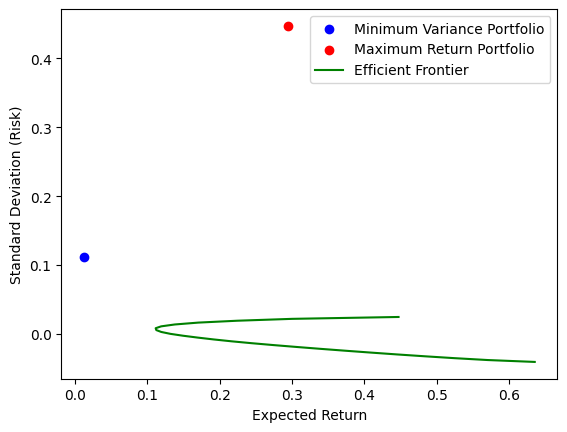

In [1147]:
# Generate efficient frontier by varying target returns or risks
target_returns = np.linspace(min(avrg_returns), max(avrg_returns), num=25)
efficient_frontier = []
for target_return in target_returns:
    target_return_constraint = ({'type': 'eq', 'fun': lambda x: np.dot(x, avrg_returns) - target_return})
    efficient_portfolio = sco.minimize(min_var, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=[cons, target_return_constraint])
    efficient_frontier.append((np.sqrt(min_var(efficient_portfolio.x)), target_return))

# Plot the portfolios
plt.scatter(result_long_only_gmv_portfolio.fun, np.sqrt(min_var(result_long_only_gmv_portfolio.x)), label='Minimum Variance Portfolio', color='blue')
plt.scatter(-result_max_return_portfolio.fun, np.sqrt(min_var(result_max_return_portfolio.x)), label='Maximum Return Portfolio', color='red')
plt.plot([p[0] for p in efficient_frontier], [p[1] for p in efficient_frontier], label='Efficient Frontier', color='green')

# Add labels and legend
plt.xlabel('Expected Return')
plt.ylabel('Standard Deviation (Risk)')
plt.legend()

# Show the plot
plt.show()

In [ ]:
target_return = avrg_returns_MVP

def return_constraint(weights):
    # Calculate the expected portfolio return
    portfolio_return = np.dot(weights, avrg_returns)
    # Subtract the target return to set up the equation as required
    return portfolio_return - target_return

# Adding the return constraint to the list of constraints
cons = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights equals 1
    {'type': 'eq', 'fun': return_constraint})       # Portfolio return equals target return

In [ ]:
efficient_frontier = []

result_efficient_portfolio = sco.minimize(min_var, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)

efficient_frontier.append((target_return, result_efficient_portfolio))

result_efficient_portfolio['fun']

0.012362878117217639

In [ ]:
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def return_constraint(weights):
    return np.dot(weights, avrg_returns) - current_return

target_returns = np.linspace(avrg_returns_MVP, avrg_returns_MaxRP, 25)
results = []  # To store the results (volatility, return)

for current_return in target_returns:
    cons = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Weights sum to 1
        {'type': 'eq', 'fun': return_constraint},        # Portfolio return equals current target return
    )
    res = sco.minimize(portfolio_volatility, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
    if res.success:  # Check if the optimizer found a solution
        results.append((res.fun, current_return))  # Append (volatility, return)

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Volatility', 'Return'])

# Now results_df contains the minimized volatility for each return, and you can plot it using your preferred plotting library (e.g., matplotlib, seaborn).

In [ ]:
#Min return data

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def return_constraint(weights):
    return np.dot(weights, avrg_returns) - current_return

target_returns = np.linspace(avrg_returns_MVP, avrg_returns_MinRP, 25)
results = []  # To store the results (volatility, return)

for current_return in target_returns:
    cons = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Weights sum to 1
        {'type': 'eq', 'fun': return_constraint},        # Portfolio return equals current target return
    )
    res = sco.minimize(portfolio_volatility, initialWeights, method='SLSQP', bounds=positivity_bounds, constraints=cons)
    if res.success:  # Check if the optimizer found a solution
        results.append((res.fun, current_return))  # Append (volatility, return)

# Convert results to a DataFrame
results_min_df = pd.DataFrame(results, columns=['Volatility', 'Return'])

# Now results_df contains the minimized volatility for each return, and you can plot it using your preferred plotting library (e.g., matplotlib, seaborn).

In [ ]:
results_df = pd.concat([results_df, results_min_df]).reset_index(drop=True)

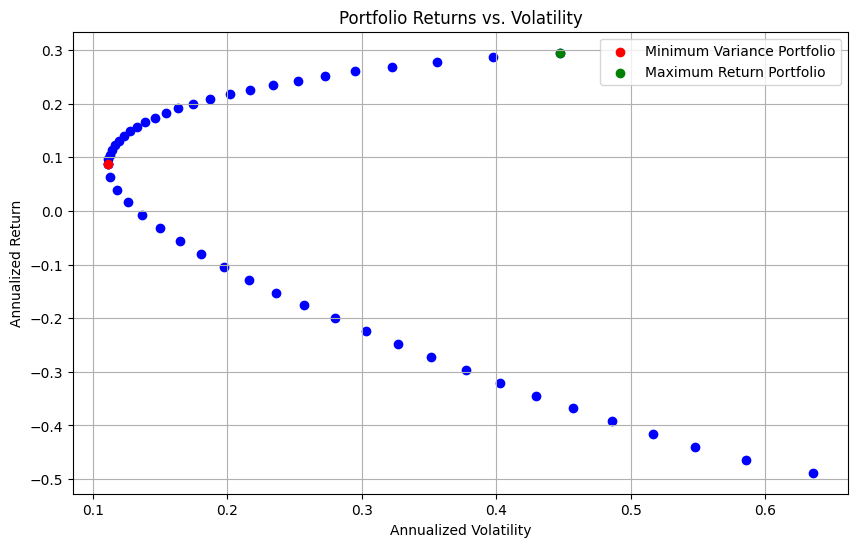

In [ ]:
results_df['Annualized Volatility'] = results_df['Volatility'] * np.sqrt(12)
results_df['Annualized Return'] = results_df['Return'] * 12

index_gmv = results_df['Annualized Volatility'].idxmin()
index_max_return = results_df['Annualized Return'].idxmax()

# Tracé avec mise en évidence des portefeuilles spécifiques
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Annualized Volatility'], results_df['Annualized Return'], color='blue')
plt.scatter(results_df.loc[index_gmv, 'Annualized Volatility'], results_df.loc[index_gmv, 'Annualized Return'], color='red', label='Minimum Variance Portfolio')
plt.scatter(results_df.loc[index_max_return, 'Annualized Volatility'], results_df.loc[index_max_return, 'Annualized Return'], color='green', label='Maximum Return Portfolio')
plt.title('Portfolio Returns vs. Volatility')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate efficient frontier by varying target returns or risks
# Note: You can repeat the optimization for different target returns or risks
# and plot the resulting portfolios to create the efficient frontier
target_returns = np.linspace(min(avrg_returns), max(avrg_returns), num=20)
efficient_frontier = []
for target_return in target_returns:
    target_return_constraint = ({'type': 'eq', 'fun': lambda x: np.dot(x, avrg_returns) - target_return})
    efficient_portfolio = sco.minimize(result_long_only_gmv_portfolio, initialWeights, method='SLSQP', bounds = positivity_bounds, constraints=[cons, target_return_constraint])
    efficient_frontier.append((np.sqrt(result_long_only_gmv_portfolio(efficient_portfolio.x)), target_return))

# Plot the portfolios
plt.scatter(result_long_only_gmv_portfolio.fun, np.sqrt(min_var(result_long_only_gmv_portfolio.x)), label='Minimum Variance Portfolio', color='blue')
plt.scatter(-result_max_return_portfolio.fun, np.sqrt(min_var(result_max_return_portfolio.x)), label='Maximum Return Portfolio', color='red')
plt.plot([p[0] for p in efficient_frontier], [p[1] for p in efficient_frontier], label='Efficient Frontier', color='green')

# Add labels and legend
plt.xlabel('Expected Return')
plt.ylabel('Standard Deviation (Risk)')
plt.legend()

plt.show()


AttributeError: 'tuple' object has no attribute 'get'

In [ ]:
target_return = expected_GVM_return # Target return of GMW

def return_constraint(weights):
    # Calculate the expected portfolio return
    portfolio_return = np.dot(weights, expected_returns)
    # Subtract the target return to set up the equation as required
    return portfolio_return - target_return

# Adding the return constraint to the list of constraints
cons = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights equals 1
    {'type': 'eq', 'fun': return_constraint})       # Portfolio return equals target return